# Visualize and compare COREs from slicing output

### Load Sources

In [2]:
#
# Compare COREs and their scores across different implementations
#

setwd("~/Documents/Git-Projects/Git-Research-Projects/CNprep-Slicing-CORE-Analysis/")
source("analysis/genomicFeatureAssignment.R") # For retrieval of COREs

### Set parameters

In [11]:
chromosomeSizes <- readRDS("./resources/chromosomeSizes.rds")

events <- c("A", "D", "AD")
output <- "output/coresResults"
dirs <- c("prev_run1_1", "prev_run_7_28_2018_x_1")

x0 <- c()
x1 <- c()
y <- c()

### Create function to visualize

In [20]:
visualizeCores <- function(event, output, dirs, chromosomeSizes) {
  x0 <- c()
  x1 <- c()
  y <- c()
  for(dir.i in seq_along(dirs)){
    outputBed <- paste0("./", output, "/", dirs[dir.i], "/selectedCores/", event, "selectedCoresBP.bed") # CORES must be same file name
    cores <- retrieveCores(outputBed) # BED file of amplification recurrent regions  
    cores <- chromsomeToAbsoluteBPConversion(cores, chromosomeSizes)
    coresStart <- cores[[2]]
    coresEnd <- cores[[3]]
    coresScore <- cores[[4]]
    x0[[dir.i]] <- coresStart
    x1[[dir.i]] <- coresEnd
    y[[dir.i]] <- coresScore
  }
  
  
  plot(range(c(x0, x1)), range(y), type="n", main=paste0("event= ", event), xlab = "absolute bp", ylab="score")
  for(i in seq_along(dirs)){
    segments(x0=x0[[i]], x1=x1[[i]], y0=y[[i]], y1=y[[i]], col = i, lwd = 4)
  }
  
  for(chrom.i in seq(nrow(chromosomeSizes))){
    abline(v=sum(as.numeric(sapply(seq(chrom.i), function(chrom.j){
      return(chromosomeSizes[chrom.j, ]$size)
    }))))
  }
  legend("topleft", legend=dirs, col = seq_along(dirs), lty=1, cex=0.8)
}


### Visualize profile for each event: amplification, deletion, and modification (both)

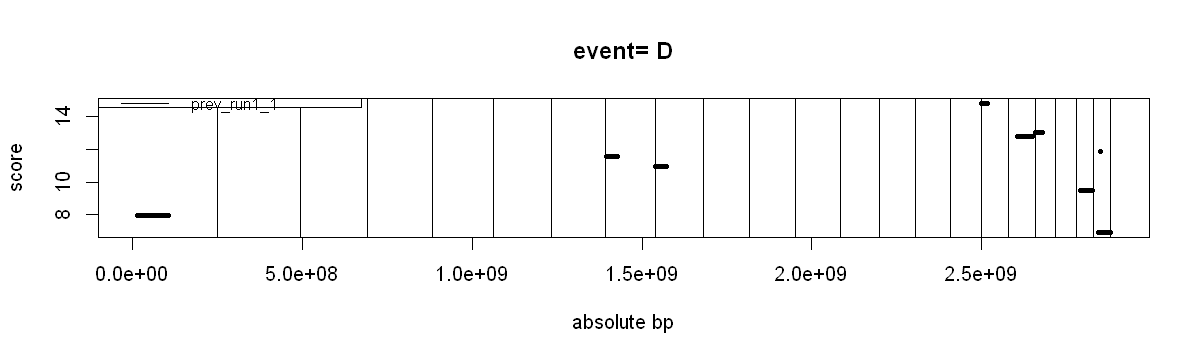

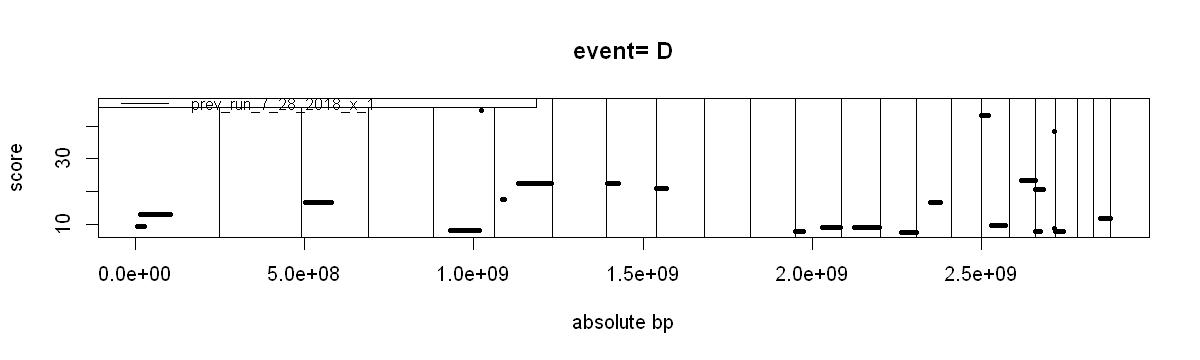

In [26]:
options(repr.plot.width=10, repr.plot.height=3)
events <- c("D")
dirs <- c("prev_run1_1")
for(event in events){
    visualizeCores(event, output, dirs, chromosomeSizes)
}

dirs <- c("prev_run_7_28_2018_x_1")
for(event in events){
    visualizeCores(event, output, dirs, chromosomeSizes)
}